# Task E - Comparison and benchmark: Accelerations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fireworks.ic as fic
import fireworks.nbodylib.dynamics as dyn
import pytest
from numpy.random import seed
import time

#%matplotlib notebook

In [2]:
seed(42)
N           = np.arange(2,150)
pos_min     = -2
pos_max     = 2
vel_min     = -10
vel_max     = 10
mass_min    = 0
mass_max    = 200


Now is time to run the three methods in order to collect the requested computational time for each of them and for each $N$.

In [3]:
time_direct = []
time_direct_vectorized  = []
time_falcon =[]

for i in range(len(N)):
    part = fic.ic_random_uniform(N[i], pos_min, pos_max, vel_min, vel_max, mass_min, mass_max)  

    #acceleration direct
    t1      = time.perf_counter()
    acc1    = dyn.acceleration_direct(part)
    t2      = time.perf_counter()
    dt      = t2 - t1
    print(f"time required to run the acceleration direct function for N = {N[i]}: ", dt)
    time_direct.append(dt)


    #acceleration vectorized
    t1      = time.perf_counter()
    acc2    = dyn.acceleration_direct_vectorized(part)
    t2      = time.perf_counter()
    dt      = t2 - t1
    print(f"time required to run the acceleration direct vectorized function for N = {N[i]}: ", dt) 
    time_direct_vectorized.append(dt)


    #acceleration pyfalcon
    t1      = time.perf_counter()
    acc1    = dyn.acceleration_pyfalcon(part)
    t2      = time.perf_counter()
    dt      = t2 - t1
    print(f"time required to run the acceleration pyfalcon function for N = {N[i]}:", dt) 
    time_falcon.append(dt)
    print("")
    

time required to run the acceleration direct function for N = 2:  0.0003842830192297697
time required to run the acceleration direct vectorized function for N = 2:  0.0006750620668753982
time required to run the acceleration pyfalcon function for N = 2: 0.0002373190363869071

time required to run the acceleration direct function for N = 3:  0.0005424779374152422
time required to run the acceleration direct vectorized function for N = 3:  0.00019724597223103046
time required to run the acceleration pyfalcon function for N = 3: 0.00021304294932633638

time required to run the acceleration direct function for N = 4:  0.0020132280187681317
time required to run the acceleration direct vectorized function for N = 4:  0.0002959429984912276
time required to run the acceleration pyfalcon function for N = 4: 0.0001418920001015067

time required to run the acceleration direct function for N = 5:  0.0008809270802885294
time required to run the acceleration direct vectorized function for N = 5:  0.

/root/miniconda3/lib/python3.10/site-packages/fireworks-0.0.5-py3.10.egg/fireworks/nbodylib/dynamics.py:188: RuntimeWarning: invalid value encountered in divide


time required to run the acceleration direct function for N = 30:  0.021488394937478006
time required to run the acceleration direct vectorized function for N = 30:  0.0007373109692707658
time required to run the acceleration pyfalcon function for N = 30: 0.0001291460357606411

time required to run the acceleration direct function for N = 31:  0.02066500100772828
time required to run the acceleration direct vectorized function for N = 31:  0.0010736200492829084
time required to run the acceleration pyfalcon function for N = 31: 0.00012708490248769522

time required to run the acceleration direct function for N = 32:  0.01864947099238634
time required to run the acceleration direct vectorized function for N = 32:  0.0009171009296551347
time required to run the acceleration pyfalcon function for N = 32: 0.00013222498819231987

time required to run the acceleration direct function for N = 33:  0.019389178953133523
time required to run the acceleration direct vectorized function for N = 33

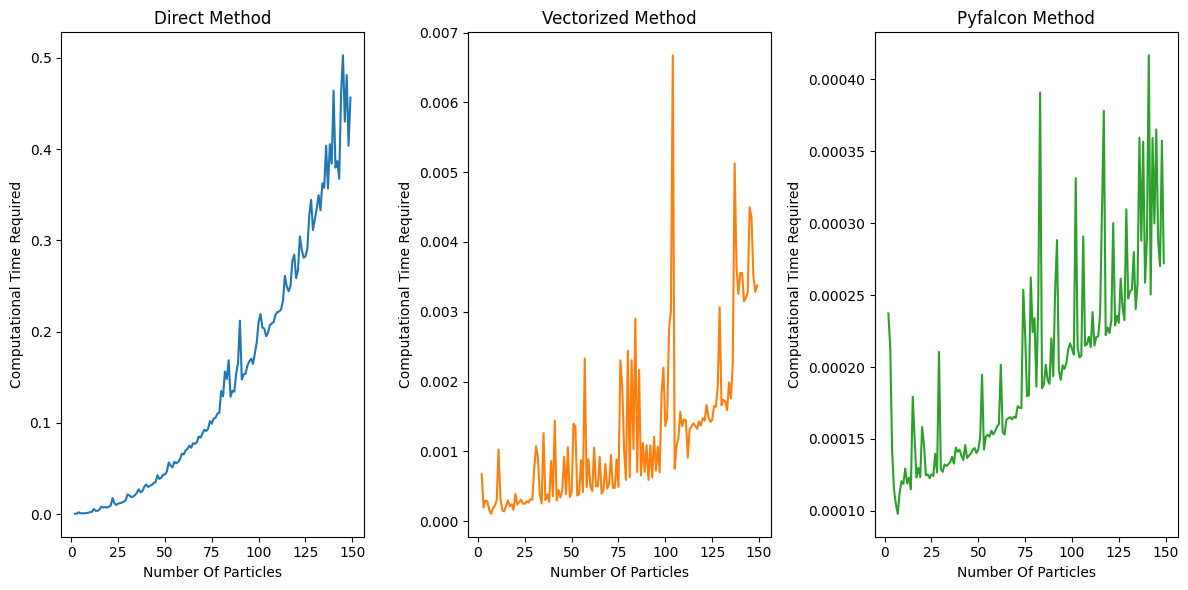

In [4]:
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.title("Direct Method")
plt.plot(N, time_direct)
plt.xlabel('Number Of Particles')
plt.ylabel('Computational Time Required')

plt.subplot(1,3,2)
plt.title("Vectorized Method")
plt.plot(N, time_direct_vectorized, c="C1")
plt.xlabel('Number Of Particles')
plt.ylabel('Computational Time Required')

plt.subplot(1,3,3)
plt.title("Pyfalcon Method")
plt.plot(N, time_falcon, c="C2")
plt.xlabel('Number Of Particles')
plt.ylabel('Computational Time Required')


#plt.xscale("log")
#plt.yscale("log")
plt.tight_layout()
plt.show()


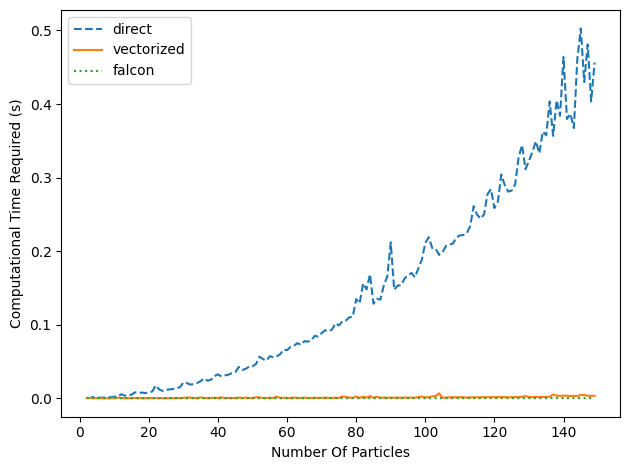

In [5]:
plt.plot(N, time_direct, label='direct', linestyle='dashed')
plt.plot(N, time_direct_vectorized, label='vectorized')
plt.plot(N, time_falcon, label='falcon', linestyle='dotted')
plt.xlabel('Number Of Particles')
plt.ylabel('Computational Time Required (s)')
plt.legend()
plt.tight_layout()
plt.show()

# COMMENTS
These results are in line with the theoretical expectations. In fact, while for a low number of particles the three method require almost the same time, as $N_{part}$ increases $t_{required}$ increases. Naturally, the time required to run the direct method is always higher with respect to the others due to the presence of the for cycles, which are responsible for the powerlaw increase at large $N$. In particular, we can see that, looking at the time complexity of the codes, while for the vectorized and pyfalcon methods this increases linearly ($\propto N$), for what concernes the direct method the increase follows a powerlaw ($\propto N^2$).
In order to analize the realistic maximum number of particles for each method, we have to see which is the complexity of the problem we are analyzing. Once we do that, It is enough to multiply it by the time required by the machine to go through the code just once. 
We can fix the time threshold as 12 hours (arbitrary). This will lead us to find $N_{max}$ for each operation. 

Before going further, we note that to compute the time required to run the cycle just once we used not the data for the 2 particles, but the one for 100 particles. In fact, when doing the computation for the 2 particles, the values of the time were similar for the different methods, and each time we run the code, the outputs were slightly different, although the seed inserted at the beginning. This is the reason why we decided to use the $100^{th}$ value.

Let's analize the three methods one by one. 

 



1) DIRECT METHOD:
In this case we have 2 for cycles. So, if we have N particles we have to compute $N(N-1) \approx N^2$ operations (in accordance with the figure).
Therefore, we have to find the time required to run the problem with 100 particles (10000 operations); then we have to divide this number by 10000 because we are looking for the time required to run the cycles just once. Afterwards, we have to multiply this time by the time complexity of the problem. 
Finally, we have to divide the $t_{max} = 12 h = 43200 s$ by the time we just found to get $N_{max}$.

In [6]:
t_max   = 43200
t       = time_direct[100]
t1      = t / (100**2)
N_max   = int(t_max/t1)

print("time required for 2 particles = ", t)
print("time required to run the cycles just once = ", t1)
print("realistic maximum nuber of particles = ", N_max)

time required for 2 particles =  0.20430831389967352
time required to run the cycles just once =  2.043083138996735e-05
realistic maximum nuber of particles =  2114451398


Therefore, $N_{max}$ (direct method)$\approx (6÷7) * 10^9$

2. VECTORIZED METHOD: 
In this case the complexity of the problem is $N$; therefore is enough to multiply N by the time required to run the problem with 2 particles, and devide $t_{max}$ by the result. This lead us to the following result:

In [7]:
t_max   = 43200
t       = time_direct_vectorized[100] 
t1      = t / 100
N_max   = int(t_max/t1)

print("time required for 2 particles = ", t)
print("realistic maximum nuber of particles = ", N_max)

time required for 2 particles =  0.0027557980502024293
realistic maximum nuber of particles =  1567603983


Therefore, $N_{max}$ (direct method)$\approx (1÷2) * 1^{10}$

3. PYFALCON METHOD:
In ths case, doing exactly as before, we get:

In [8]:
t_max   = 43200
t       = time_falcon[100]
t1      = t / 100
N_max   = int(t_max/t1)

print("time required for 2 particles = ", t)
print("realistic maximum nuber of particles = ", N_max)

time required for 2 particles =  0.00033126003108918667
realistic maximum nuber of particles =  13041114515


Therefore, $N_{max}$ (direct method)$\approx (5÷6) * 10^{10}$